# Task 1: Data checking

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

In [5]:
data = data.drop_duplicates()

#### Checking for missing values

In [6]:
missing_values = data.isnull().sum()

print(missing_values)

Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64


#### Checking and removing outliers using boxplots

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

<AxesSubplot: >

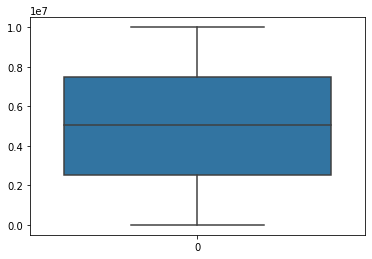

In [8]:
# Checking outliers for Flight Id column
import seaborn as sns
sns.boxplot(data['Flight ID'])

<AxesSubplot: >

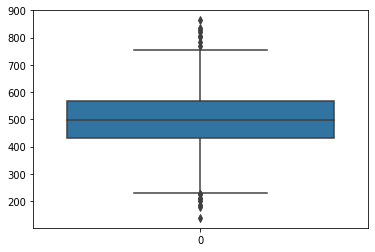

In [9]:
# Checking outliers for the Flight_Distance column
sns.boxplot(data['Flight_Distance'])

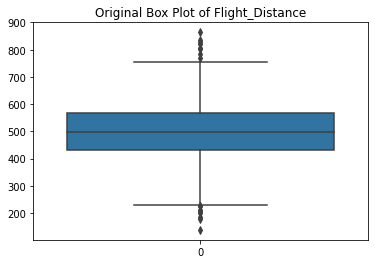

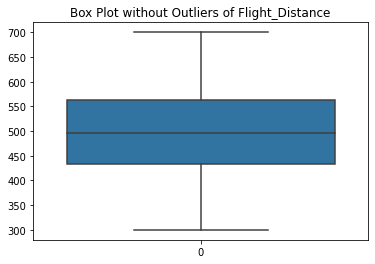

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(data, column, lower_threshold, upper_threshold):
    sns.boxplot(data[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = data[(data[column] >= lower_threshold) & (data[column] <= upper_threshold)]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()

    return removed_outliers

# Specify the threshold values
lower_threshold = 300
upper_threshold = 700

data_new = removal_box_plot(data, 'Flight_Distance', lower_threshold, upper_threshold)


<AxesSubplot: >

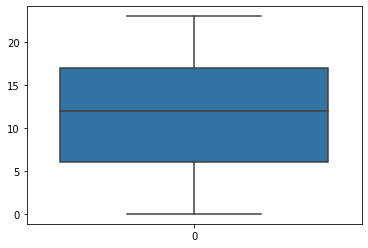

In [11]:
# Checking outliers for the Scheduled_Departure_Time column     
sns.boxplot(data_new['Scheduled_Departure_Time'])

<AxesSubplot: >

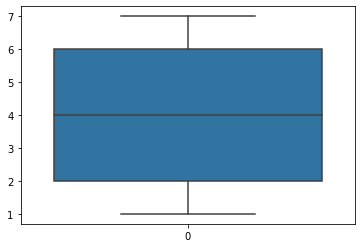

In [12]:
# Checking outliers for the Day_of_Week column     
sns.boxplot(data_new['Day_of_Week'])

<AxesSubplot: >

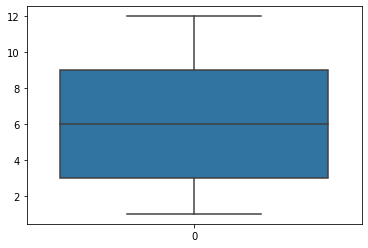

In [13]:
# Checking outliers for the Month column     
sns.boxplot(data_new['Month'])

<AxesSubplot: >

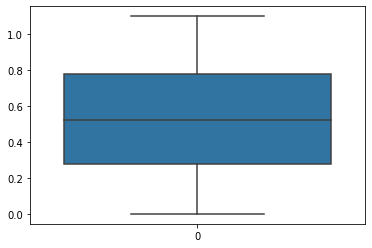

In [14]:
# Checking outliers for the Weather_Score column     
sns.boxplot(data_new['Weather_Score'])

<AxesSubplot: >

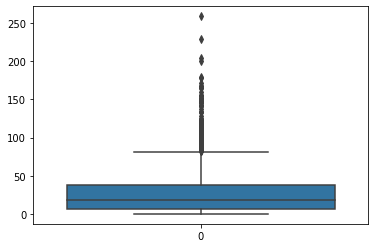

In [15]:
# Checking outliers for the Previous_Flight_Delay_Minutes column
sns.boxplot(data_new['Previous_Flight_Delay_Minutes'])

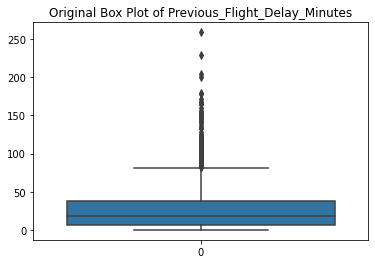

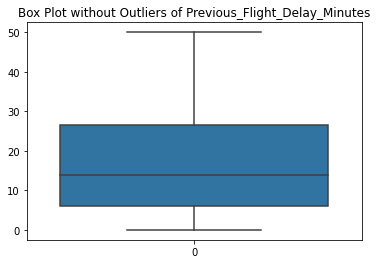

In [16]:
def removal_box_plot(data_new, column, threshold):
    sns.boxplot(data_new[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = data_new[data_new[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    
    return removed_outliers

threshold_value = 50

data_new1 = removal_box_plot(data_new, 'Previous_Flight_Delay_Minutes', threshold_value)

<AxesSubplot: >

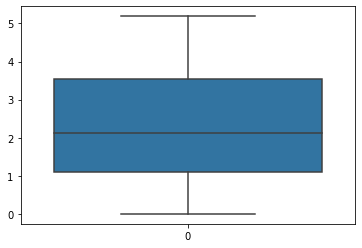

In [17]:
# Checking outliers for Airline_Rating column
sns.boxplot(data_new['Airline_Rating'])

<AxesSubplot: >

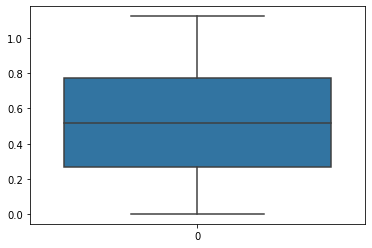

In [18]:
# Checking outliers for the Passenger_Load column
sns.boxplot(data_new['Passenger_Load'])

<AxesSubplot: >

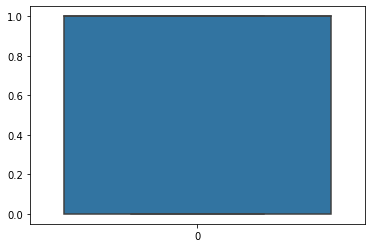

In [19]:
# Checking outliers for the Flight_Cancelled column
sns.boxplot(data_new['Flight_Cancelled'])

#### Checking the data types for each column

In [20]:
print(data_new1.dtypes)

Flight ID                          int64
Airline                           object
Flight_Distance                    int64
Origin_Airport                    object
Destination_Airport               object
Scheduled_Departure_Time           int64
Day_of_Week                        int64
Month                              int64
Airplane_Type                     object
Weather_Score                    float64
Previous_Flight_Delay_Minutes    float64
Airline_Rating                   float64
Passenger_Load                   float64
Flight_Cancelled                   int64
dtype: object


In [21]:
data_new1.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0
5,9450813,Airline B,446,Airport 4,Airport 5,3,5,2,Type D,0.030072,5.0,2.228958,0.424126,0


##### The data types are appropriate for the data they represent.

# Task 2: Exploratory Data Analysis

#### Descriptive statistics

In [23]:
# For numeric columns
data_new1.describe()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
count,2.454000e+03,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,5.013131e+06,499.320293,11.538712,3.962510,6.374491,0.530025,17.423073,2.337628,0.521403,0.629584
std,2.850340e+06,88.768593,6.953395,2.021345,3.491230,0.290777,13.732761,1.430148,0.294602,0.483014
min,3.681000e+03,300.000000,0.000000,1.000000,1.000000,0.000965,0.000000,0.000103,0.001039,0.000000
25%,2.588012e+06,435.000000,6.000000,2.000000,3.000000,0.281619,6.000000,1.100178,0.272121,0.000000
50%,5.136469e+06,497.000000,12.000000,4.000000,6.000000,0.528497,14.000000,2.164122,0.524155,1.000000
75%,7.457813e+06,564.000000,18.000000,6.000000,9.000000,0.781446,26.500003,3.544712,0.776592,1.000000
max,9.992513e+06,700.000000,23.000000,7.000000,12.000000,1.098354,50.000000,5.189038,1.123559,1.000000


Insights

The average flight distance is approximately 499.32 units, with a standard deviation of around 88.77 units.
The mean scheduled departure time is around 11:54 AM
The flights are fairly evenly distributed across the week.
Flights are slightly more frequent in April (month 4), with a mean month value of approximately 6.37 and a standard deviation of about 3.49.
The average weather score is approximately 0.53, with a standard deviation of around 0.29. This suggests that, on average, weather conditions are somewhat moderate.
The average previous flight delay is approximately 17.42 minutes, with a standard deviation of about 13.73 minutes. This indicates that there are often previous flight delays, which might impact subsequent flights.
Ratings range from very low to high, with a minimum value of around 0.1 and a maximum value of about 5.19.
The average passenger load is about 52.14%, with a standard deviation of approximately 29.46%, implying that on average flights are full.
The average flight cancellation rate is around 63%, with a standard deviation of about 48.3%. This indicates that a substantial portion of flights in the dataset were cancelled.

In [24]:
# For none numeric columns
data_new1.describe(include='object')

,Airline,Origin_Airport,Destination_Airport,Airplane_Type
count,2454,2454,2454,2454
unique,5,5,4,5
top,Airline A,Airport 1,Airport 2,Type A
freq,957,879,1340,941


Insights:

There are 5 unique airlines in the dataset.
The most frequent airline is "Airline A", with 957 occurrences.

There are 5 unique origin airports in the dataset.
The most frequent origin airport is "Airport 1", with 879 occurrences.

There are 4 unique destination airports in the dataset.
The most frequent destination airport is "Airport 2", with 1340 occurrences.

There are 5 unique airplane types in the dataset.
The most frequent airplane type is "Type A", with 941 occurrences.

#### Distribution of data

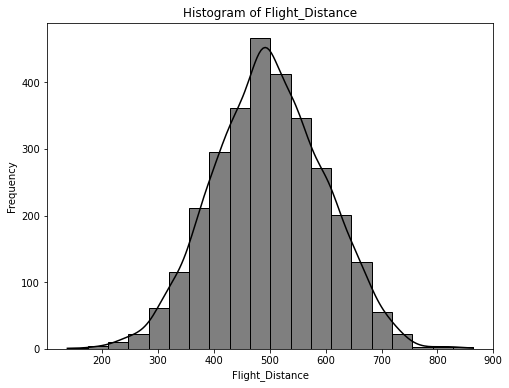

In [47]:
column_name = 'Flight_Distance'
plt.figure(figsize=(8, 6))
sns.histplot(data['Flight_Distance'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

The Flight_Distance column exhibits a bell-shaped distribution, indicating that the distribution of flight distances follows a normal distribution.

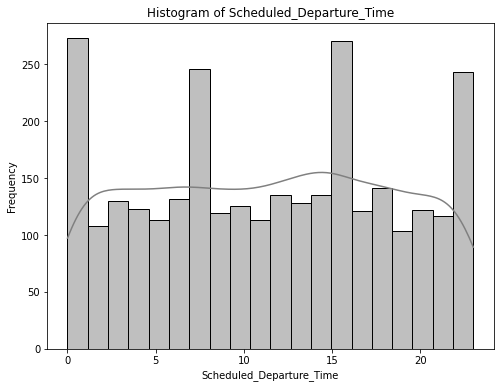

In [49]:
column_name = 'Scheduled_Departure_Time'
plt.figure(figsize=(8, 6))
sns.histplot(data['Scheduled_Departure_Time'], kde=True, bins=20, color='grey')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

The multimodal nature of the histogram suggests that flights may be scheduled at specific times to accommodate different travel preferences, operational constraints, or peak demand periods.

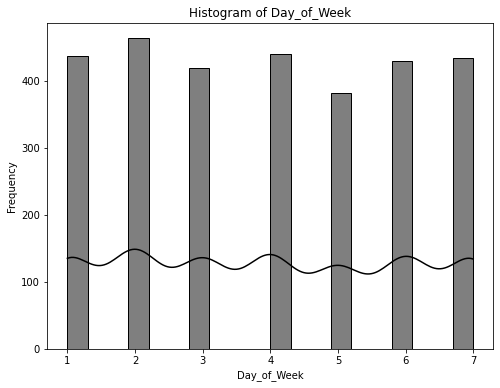

In [60]:
column_name = 'Day_of_Week'
plt.figure(figsize=(8, 6))
sns.histplot(data['Day_of_Week'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

The wavy pattern indicates that the number of flights scheduled on different days of the week varies over time.

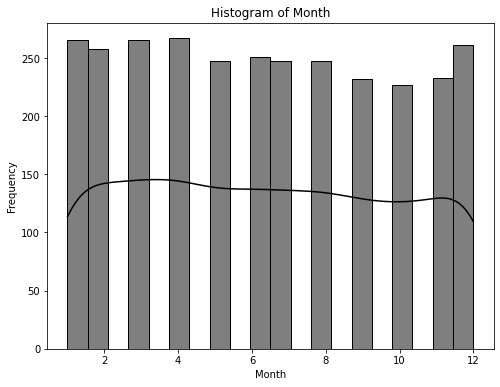

In [61]:
column_name = 'Month'
plt.figure(figsize=(8, 6))
sns.histplot(data['Month'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

The curve indicates that the number of flights scheduled varies across different months of the year.

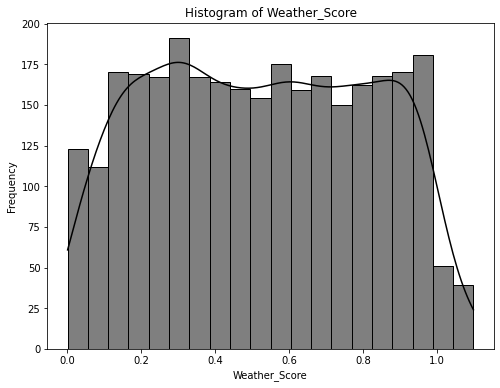

In [62]:
column_name = 'Weather_Score'
plt.figure(figsize=(8, 6))
sns.histplot(data['Weather_Score'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

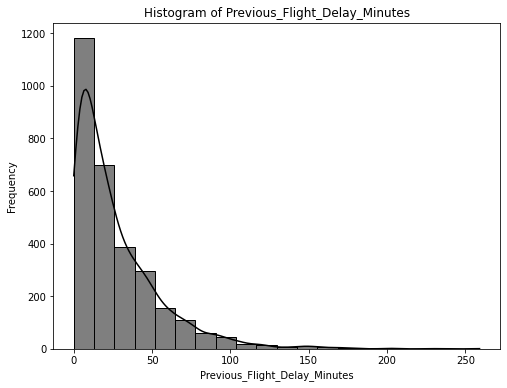

In [63]:
column_name = 'Previous_Flight_Delay_Minutes'
plt.figure(figsize=(8, 6))
sns.histplot(data['Previous_Flight_Delay_Minutes'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

The right-skewed distribution suggests that the majority of flights experience shorter delays, with fewer flights experiencing longer delays

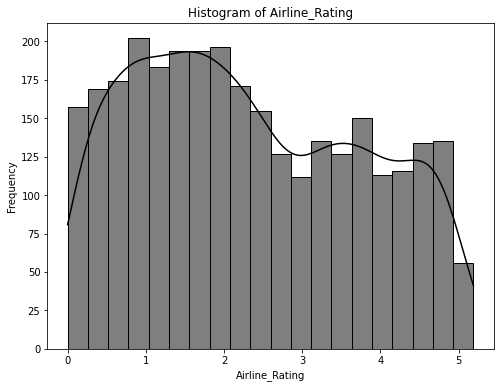

In [64]:
column_name = 'Airline_Rating'
plt.figure(figsize=(8, 6))
sns.histplot(data['Airline_Rating'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

The presence of multiple peaks in the histogram indicates that airline ratings are not uniformly distributed but rather clustered into distinct groups.

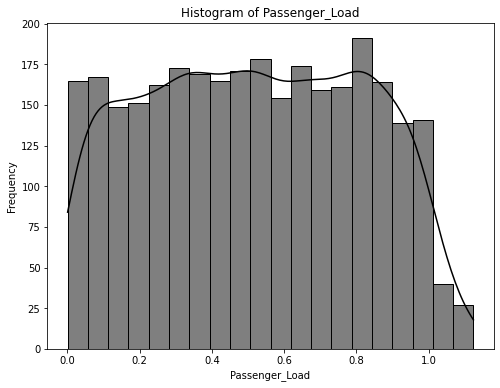

In [68]:
column_name = 'Passenger_Load'
plt.figure(figsize=(8, 6))
sns.histplot(data['Passenger_Load'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

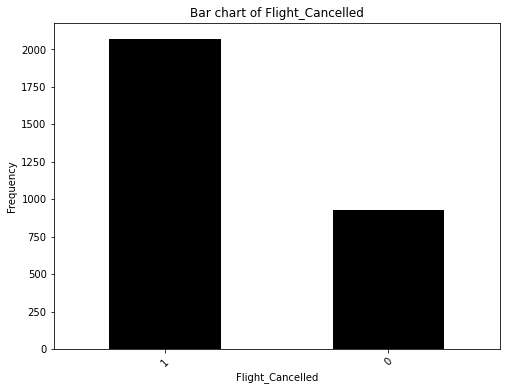

In [75]:
column_name= 'Flight_Cancelled'
plt.figure(figsize=(8, 6))
data[column_name].value_counts().plot(kind='bar', color='black')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The significantly higher frequency of bars for category 1 (flight cancelled) compared to category 0 (flight not cancelled) indicates that a substantial number of flights were cancelled according to the dataset.

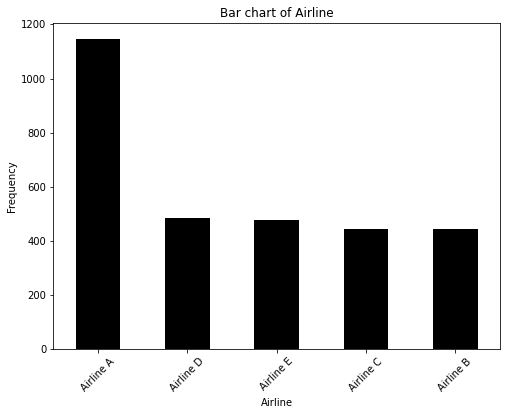

In [76]:
column_name= 'Airline'
plt.figure(figsize=(8, 6))
data[column_name].value_counts().plot(kind='bar', color='black')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Airline A is the most frequent airline

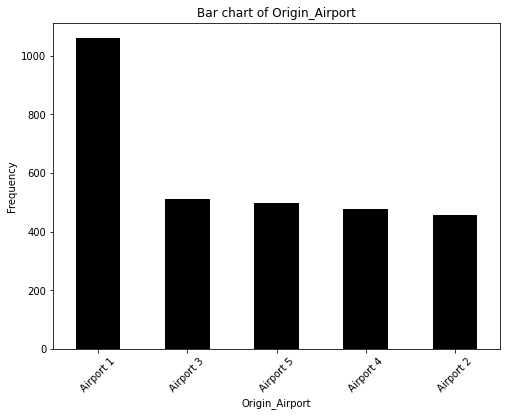

In [77]:
column_name= 'Origin_Airport'
plt.figure(figsize=(8, 6))
data[column_name].value_counts().plot(kind='bar', color='black')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Airport 1 is the most frequently used origin airport

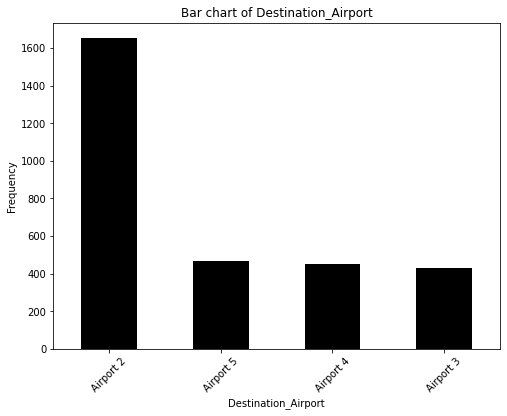

In [78]:
column_name= 'Destination_Airport'
plt.figure(figsize=(8, 6))
data[column_name].value_counts().plot(kind='bar', color='black')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Airport 2 is the most frequently used destination airport

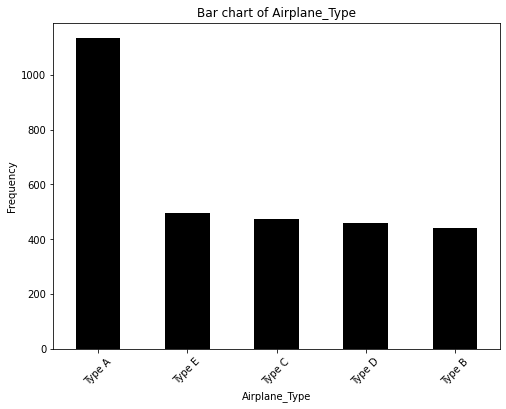

In [79]:
column_name= 'Airplane_Type'
plt.figure(figsize=(8, 6))
data[column_name].value_counts().plot(kind='bar', color='black')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Airplane type A is the most frequent one.

### Relationship between features

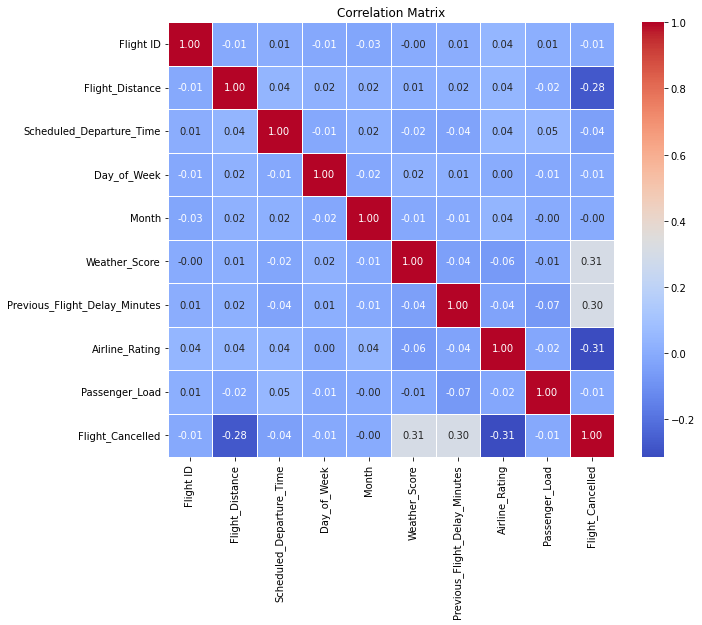

In [96]:
numerical_columns = ['Flight ID','Flight_Distance', 'Scheduled_Departure_Time', 'Day_of_Week', 'Month', 
                     'Weather_Score', 'Previous_Flight_Delay_Minutes', 'Airline_Rating', 
                     'Passenger_Load', 'Flight_Cancelled']  

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation coefficient of 1 signifies a strong positive linear relationship between the variables. This means that when one variable increases, the other variable increases proportionally, and vice versa.

#### Relationship between features and target variable

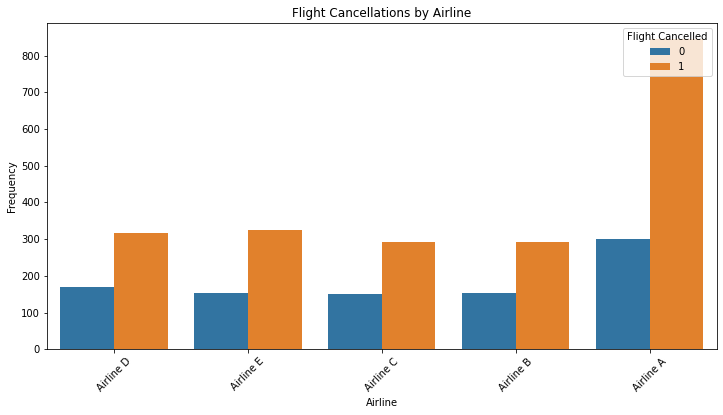

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Airline', hue='Flight_Cancelled', data=data)
plt.title('Flight Cancellations by Airline')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Flight Cancelled', loc='upper right')
plt.show()

There are more flight cancellations for Airline A which is the mostly used airline.

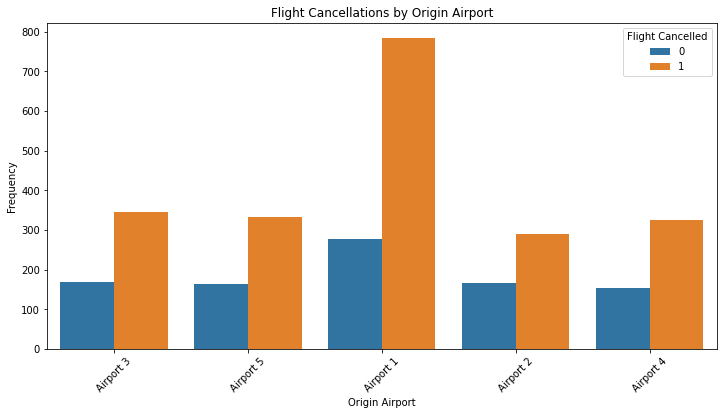

In [99]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Origin_Airport', hue='Flight_Cancelled', data=data)
plt.title('Flight Cancellations by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Flight Cancelled', loc='upper right')
plt.show()

Origin airport 1 has the highets number of cancelled flights which is probably due to that it is the mostly used origin airport.

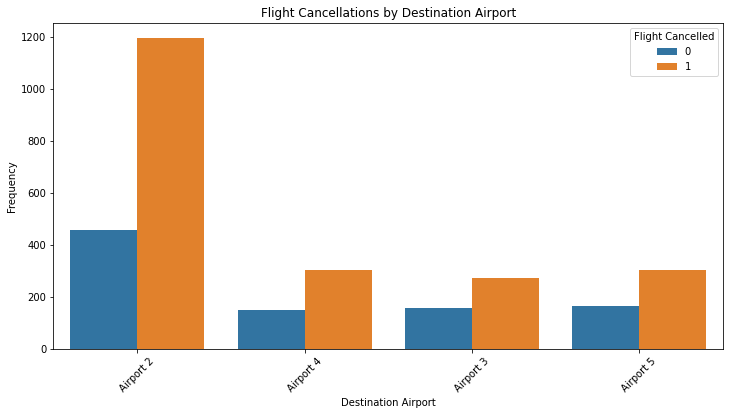

In [100]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Destination_Airport', hue='Flight_Cancelled', data=data)
plt.title('Flight Cancellations by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Flight Cancelled', loc='upper right')
plt.show()

Destination airport 2 has the highest number of flight cancellations which is probably due to that it is the mostly used destination airport.

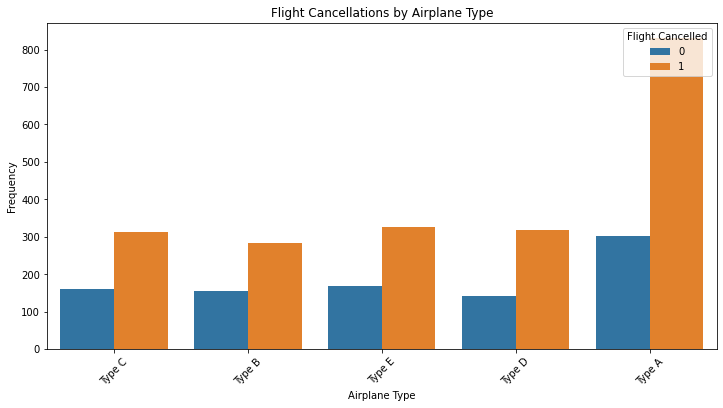

In [101]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Airplane_Type', hue='Flight_Cancelled', data=data)
plt.title('Flight Cancellations by Airplane Type')
plt.xlabel('Airplane Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Flight Cancelled', loc='upper right')
plt.show()

Airplane type A, which is the mostly used, has the highest number of flight cancellations.

In [103]:
# Correlation coefficients between numerical features and target variable
correlation_matrix = data[numerical_columns + ['Flight_Cancelled']].corr()
correlation_with_target = correlation_matrix['Flight_Cancelled'].drop('Flight_Cancelled')
print('Correlation with Target Variable:')
print(correlation_with_target)

Correlation with Target Variable:
                               Flight_Cancelled  Flight_Cancelled
Flight ID                             -0.009101         -0.009101
Flight_Distance                       -0.277471         -0.277471
Scheduled_Departure_Time              -0.043733         -0.043733
Day_of_Week                           -0.008705         -0.008705
Month                                 -0.004242         -0.004242
Weather_Score                          0.305762          0.305762
Previous_Flight_Delay_Minutes          0.302805          0.302805
Airline_Rating                        -0.314099         -0.314099
Passenger_Load                        -0.008320         -0.008320


Negative Correlation:
Flight_Distance" (-0.277471) and "Airline_Rating" (-0.314099) exhibit negative correlations with "Flight_Cancelled". This suggests that flights with longer distances and higher airline ratings are less likely to be cancelled. This makes intuitive sense, as longer flights might be more profitable and airlines with better reputations may have better operational efficiency and fewer cancellations.

Positive Correlation:
"Weather_Score" (0.305762) and "Previous_Flight_Delay_Minutes" (0.302805) show positive correlations with "Flight_Cancelled". This indicates that adverse weather conditions and previous flight delays are associated with a higher likelihood of flight cancellations. Poor weather conditions can affect flight operations, leading to cancellations for safety reasons, while previous delays may disrupt scheduling and increase the risk of subsequent cancellations.

Weak Correlations:
Scheduled_Departure_Time", "Day_of_Week", "Month", and "Passenger_Load" show weak correlations (close to zero) with "Flight_Cancelled". This suggests that these factors may have minimal influence on the likelihood of flight cancellations in the dataset.